**<h1> Mortality Predictions in ICU using ANN** 
    


In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import math 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
import keras

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style( 'white' )

In [2]:
df = pd.read_csv(r"C:\Users\range\Downloads\Mortality+Prediction+in+ICU\Mortality Prediction in ICU\train.csv", encoding = 'utf-8')

In [3]:
labels = pd.read_csv(r"C:\Users\range\Downloads\Mortality+Prediction+in+ICU\Mortality Prediction in ICU\labels.csv", encoding = 'utf-8')

**<h2> Exploratory Data Analysis**

Henceforth, we will be doing the exploratory data analysis in order to identify the significant parameters contributing to the mortality rate and neglecting the rest.

In [4]:
df.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951219,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [5]:
df.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH'],
      dtype='object')

In [6]:
df.shape

(3999, 42)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ALP          3999 non-null   float64
 1   ALT          3999 non-null   float64
 2   AST          3999 non-null   float64
 3   Age          3999 non-null   int64  
 4   Albumin      3999 non-null   float64
 5   BUN          3999 non-null   float64
 6   Bilirubin    3999 non-null   float64
 7   Cholesterol  3999 non-null   float64
 8   Creatinine   3999 non-null   float64
 9   DiasABP      3999 non-null   float64
 10  FiO2         3999 non-null   float64
 11  GCS          3999 non-null   float64
 12  Gender       3999 non-null   int64  
 13  Glucose      3999 non-null   float64
 14  HCO3         3999 non-null   float64
 15  HCT          3999 non-null   float64
 16  HR           3999 non-null   float64
 17  Height       3999 non-null   float64
 18  ICUType      3999 non-null   int64  
 19  K     

In [8]:
df.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,...,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,...,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,...,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,...,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,...,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,...,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,...,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500


In [9]:
labels.shape

(3999, 1)

In [10]:
labels

,In-hospital_death
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [11]:
labels["In-hospital_death"].value_counts()

In-hospital_death
0    3445
1     554
Name: count, dtype: int64

In [12]:
temp  =[]
for i in labels["In-hospital_death"]:
  if i == 0:
    temp.append([1,0])
  else:
    temp.append([0,1])
temp = np.array(temp)

In [13]:
print(temp.shape)

(3999, 2)


In [14]:
new = pd.concat([df , labels] , axis = 1)
print(new.shape)

(3999, 43)


**<h3>Using Correlation heatmap to find important features and their relations with other features.**

<Axes: >

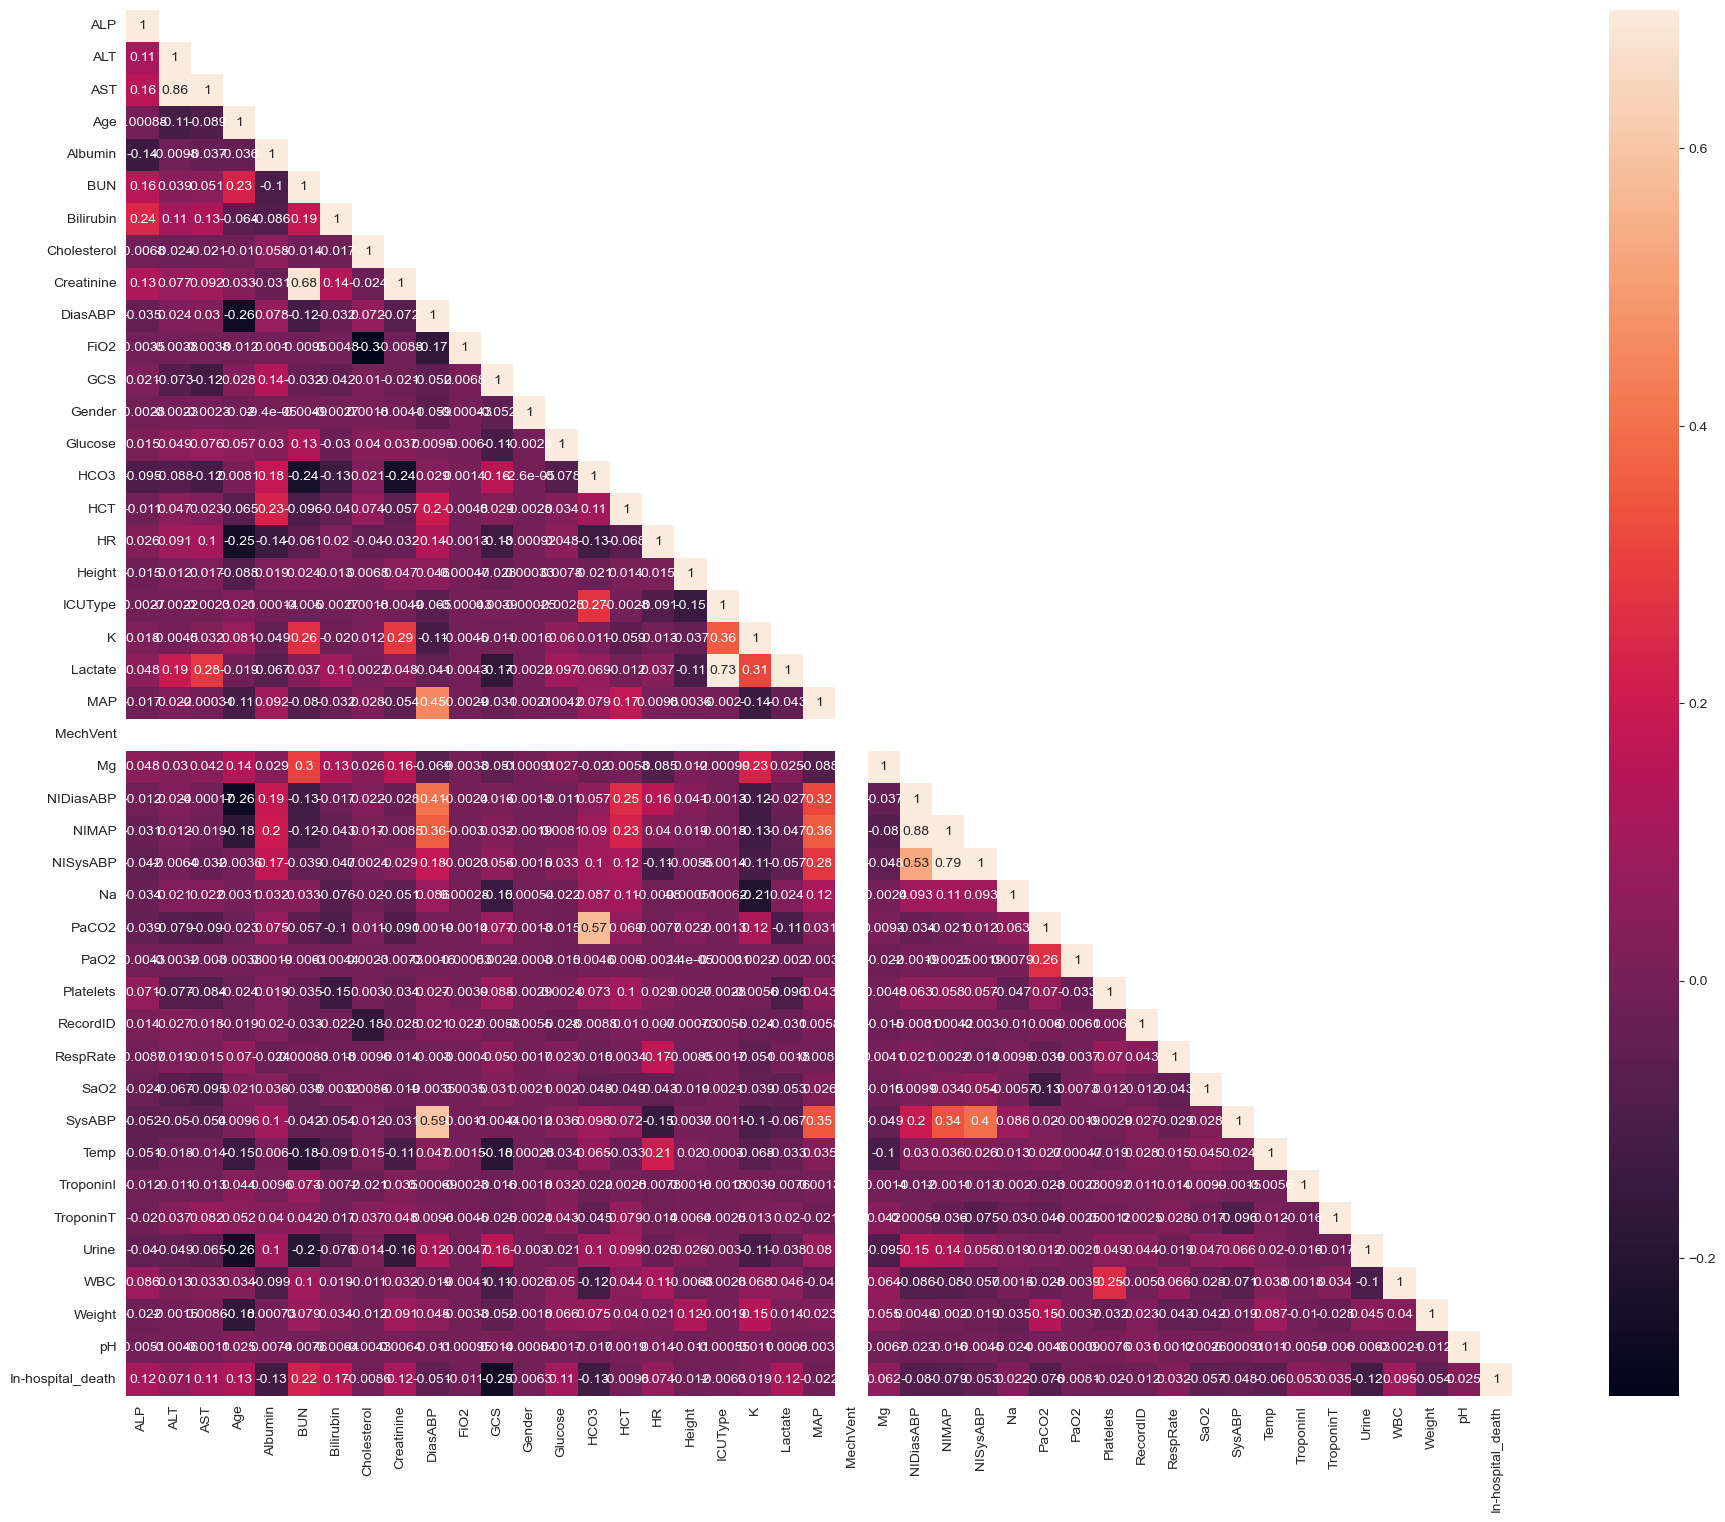

In [15]:
correlation_map = new[new.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(25,18)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

In [16]:
new_df = new.drop(['In-hospital_death'] , axis =1)
new_df.shape

(3999, 42)

In [17]:
df = new_df

In [18]:
df = df.drop(['Gender','Cholesterol','HCT','ICUType','Height'] , axis =1)

**<h3> Scaling Data**

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

**<H2> Deep Learning Model**

Dataframe df will be given as X parameter and Inhospitaldeath case will be given as Y.

In [20]:
X = df
y = temp

In [21]:
print(X.shape , y.shape)

(3999, 37) (3999, 2)


**<h3>Splitting Dataset**

In [22]:
X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size = 0.2)

In [23]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3199, 37) (800, 37) (3199, 2) (800, 2)


Importing necessary files.

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

In [28]:
conda install keras

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\range\anaconda3

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.12.12 |       haa95532_0         127 KB
    certifi-2023.11.17         |  py311haa95532_0         160 KB
    keras-2.6.0                |     pyhd3eb1b0_0         721 KB
    openssl-3.0.12             |       h2bbff1b_0         7.4 MB
    ------------------------------------------------------------
                                           Total:         8.4 MB

The following NEW packages will be INSTALLED:

  keras              pkgs/main/noarch::keras-2.6.0-pyhd3eb1b0_0 

The following packages will be UPDATED:

  ca-certificates                     2023.08.22-haa95532_0 --> 2023.12.12-haa95532_0 
  certifi                         2



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




**<h3> Building ANN Model**

In [30]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1] , activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.0005),loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2432      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 196)               25284     
                                                                 
 dense_3 (Dense)             (None, 196)               38612     
                                                                 
 batch_normalization (Batch  (None, 196)               784       
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 256)               50432     
                                                        

**<h3> Fitting the model**


In [31]:
history = model.fit(X_train, y_train , epochs=15 , batch_size = 128 , validation_data=(X_test, y_test))

Epoch 1/15
25/25 [==============================] - 3s 24ms/step - loss: 0.4058 - accuracy: 0.8390 - val_loss: 0.4281 - val_accuracy: 0.8687
Epoch 2/15
25/25 [==============================] - 0s 7ms/step - loss: 0.3442 - accuracy: 0.8634 - val_loss: 0.4460 - val_accuracy: 0.8687
Epoch 3/15
25/25 [==============================] - 0s 10ms/step - loss: 0.3224 - accuracy: 0.8725 - val_loss: 0.4254 - val_accuracy: 0.8687
Epoch 4/15
25/25 [==============================] - 0s 8ms/step - loss: 0.3095 - accuracy: 0.8728 - val_loss: 0.4375 - val_accuracy: 0.8687
Epoch 5/15
25/25 [==============================] - 0s 9ms/step - loss: 0.3085 - accuracy: 0.8728 - val_loss: 0.4618 - val_accuracy: 0.8687
Epoch 6/15
25/25 [==============================] - 0s 7ms/step - loss: 0.2988 - accuracy: 0.8803 - val_loss: 0.4293 - val_accuracy: 0.8687
Epoch 7/15
25/25 [==============================] - 0s 7ms/step - loss: 0.2879 - accuracy: 0.8815 - val_loss: 0.4026 - val_accuracy: 0.8687
Epoch 8/15
25/25 [

**<h3> Evaluating Performance using Accuracy ,Loss and Confusion Matrix**



In [32]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


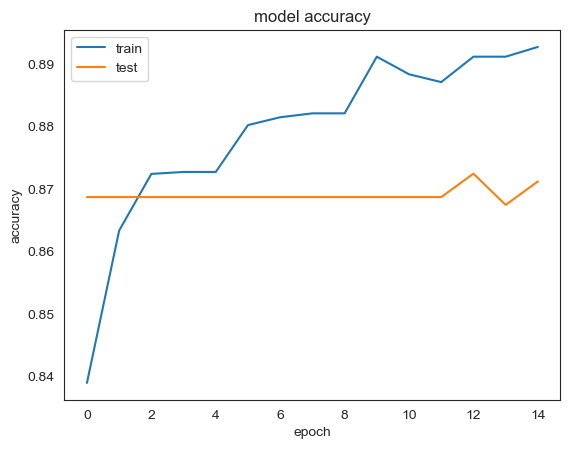

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

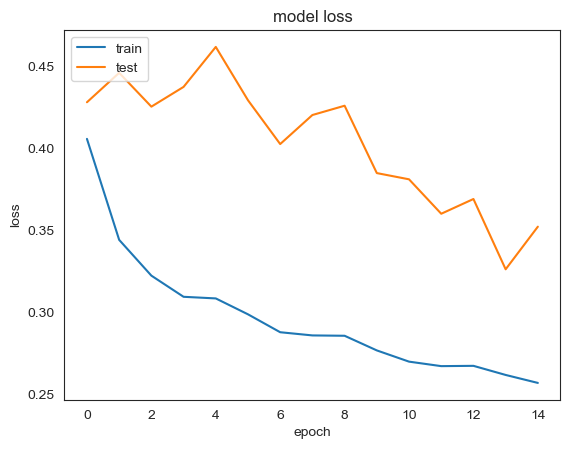

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

25/25 [==============================] - 0s 3ms/step


In [36]:
cnf_matrix = confusion_matrix(y_true, pred)
print(cnf_matrix)

[[692   3]
 [100   5]]


In [37]:
print(accuracy_score(y_true,pred))

0.87125


**<h2> Summary**

The above model has a loss of 0.35 and an accuracy of about 87%. This is the maximum accuracy it can reach with the given size of data. 

This model can be successfully used for predicting mortality in ICUs but then one should keep in mind that these values are just predicted values and the predictions can be wrong.